In [1]:
# Week 1 : Data Exploration and Visualization
import pandas as pd
from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
kddcup99_data = fetch_kddcup99(percent10=True)
X = pd.DataFrame(kddcup99_data.data)
y = pd.Series(kddcup99_data.target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis
# Replace 'column_name' with actual column names from the dataset
print(X_train.describe())




            0        1         2       3       4       5       6       7   \
count   395216   395216    395216  395216  395216  395216  395216  395216   
unique    2117        3        65      11    3065    9747       2       3   
top          0  b'icmp'  b'ecr_i'   b'SF'    1032       0       0       0   
freq    385342   226609    224889  302626  182263  326395  395195  394200   

            8       9   ...      31      32        33        34        35  \
count   395216  395216  ...  395216  395216  395216.0  395216.0  395216.0   
unique       4      22  ...     256     256     101.0     101.0     101.0   
top          0       0  ...     255     255       1.0       0.0       1.0   
freq    395212  392662  ...  346285  270015  278089.0  277427.0  230819.0   

              36        37        38        39        40  
count   395216.0  395216.0  395216.0  395216.0  395216.0  
unique      64.0      97.0      61.0     101.0     101.0  
top          0.0       0.0       0.0       0.0     

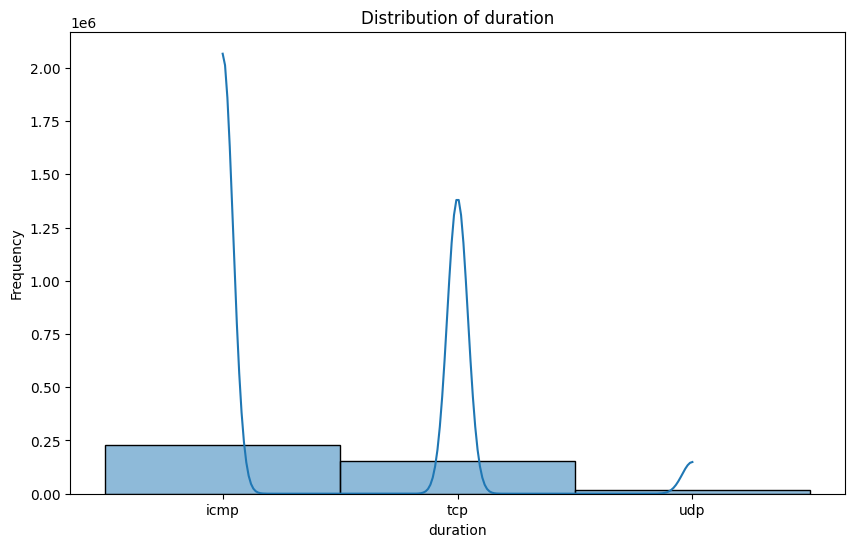

In [2]:
# Week 2 : Feature Engineering and Visualization
import pandas as pd
from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the dataset
kddcup99_data = fetch_kddcup99(percent10=True)
X = pd.DataFrame(kddcup99_data.data, columns=kddcup99_data.feature_names)
y = pd.Series(kddcup99_data.target)

# Convert byte columns to strings for categorical processing
categorical_columns = ['protocol_type', 'service', 'flag']
X[categorical_columns] = X[categorical_columns].applymap(lambda x: x.decode('utf-8'))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually specify categorical and numerical columns based on dataset knowledge
categorical_cols = ['protocol_type', 'service', 'flag']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create a ColumnTransformer to transform the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Applying the transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Data Visualization
# Plotting the distribution of a numerical feature (make sure the column exists)
if categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[categorical_cols[0]], kde=True)
    plt.title('Distribution of ' + numerical_cols[0])
    plt.xlabel(numerical_cols[0])
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No numerical columns to plot.")




In [3]:
column_names = X.columns
print("Column names:", column_names)

Column names: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [4]:
# Week 3 : Model Building and Regularization
from sklearn.datasets import fetch_kddcup99
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Fetch the dataset
kddcup99_data = fetch_kddcup99(percent10=True)
X = pd.DataFrame(kddcup99_data.data, columns=kddcup99_data.feature_names)
y = pd.Series(kddcup99_data.target)

# Convert byte columns to strings for categorical processing
categorical_columns = ['protocol_type', 'service', 'flag']
X[categorical_columns] = X[categorical_columns].applymap(lambda x: x.decode('utf-8'))
y = y.apply(lambda x: x.decode('utf-8').strip())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce dataset size for faster execution
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Identify categorical and numerical columns
categorical_cols = ['protocol_type', 'service', 'flag']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create a ColumnTransformer to transform the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Applying the transformations
X_train_processed = preprocessor.fit_transform(X_train_sample)
X_test_processed = preprocessor.transform(X_test)

# Combine, encode, and then split the target variable
y_combined = pd.concat([y_train_sample, y_test])
label_encoder = LabelEncoder()
y_combined_encoded = label_encoder.fit_transform(y_combined)

# Split them back to train and test
train_size = len(y_train_sample)
y_train_encoded = y_combined_encoded[:train_size]
y_test_encoded = y_combined_encoded[train_size:]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Logistic Regression with parallel processing
log_reg = LogisticRegression(max_iter=1000, tol=0.1, n_jobs=-1)
log_reg.fit(X_train_pca, y_train_encoded)

# Predictions and Evaluation for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_pca)
y_pred_log_reg_labels = label_encoder.inverse_transform(y_pred_log_reg)

print("Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_labels))
print("Precision:", precision_score(y_test, y_pred_log_reg_labels, average='macro'))
print("Recall:", recall_score(y_test, y_pred_log_reg_labels, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg_labels, average='macro'))

# SVM with parallel processing
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train_encoded)

# Predictions and Evaluation for SVM
y_pred_svm = svm.predict(X_test_pca)
y_pred_svm_labels = label_encoder.inverse_transform(y_pred_svm)

print("\nSVM Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_labels))
print("Precision:", precision_score(y_test, y_pred_svm_labels, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm_labels, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_svm_labels, average='macro'))


Logistic Regression Evaluation
Accuracy: 0.9959819847173726


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.7003037318688762
Recall: 0.647366974467689
F1 Score: 0.666767091200389

SVM Evaluation
Accuracy: 0.9967208137240018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.6812926805125575
Recall: 0.6694871314532322
F1 Score: 0.6702834681766532


In [5]:
 # Week 4 : Dimensionality Reduction, Performance Measurement, and Model Evaluation
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_pca, X_test_pca, y_train_encoded, and y_test_encoded are already defined from Week 3

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_pca, y_train_encoded)
y_pred_dt = decision_tree.predict(X_test_pca)
y_pred_dt_labels = label_encoder.inverse_transform(y_pred_dt)

# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_pca, y_train_encoded)
y_pred_rf = random_forest.predict(X_test_pca)
y_pred_rf_labels = label_encoder.inverse_transform(y_pred_rf)

# Evaluation Functions
def evaluate_model(name, true_labels, pred_labels):
    print(f"{name} Evaluation")
    print("Accuracy:", accuracy_score(true_labels, pred_labels))
    print("Precision:", precision_score(true_labels, pred_labels, average='macro'))
    print("Recall:", recall_score(true_labels, pred_labels, average='macro'))
    print("F1 Score:", f1_score(true_labels, pred_labels, average='macro'))
    print("\n")

# Evaluate All Models
evaluate_model("Logistic Regression", y_test, y_pred_log_reg_labels)
evaluate_model("SVM", y_test, y_pred_svm_labels)
evaluate_model("Decision Tree", y_test, y_pred_dt_labels)
evaluate_model("Random Forest", y_test, y_pred_rf_labels)


Logistic Regression Evaluation
Accuracy: 0.9959819847173726


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.7003037318688762
Recall: 0.647366974467689
F1 Score: 0.666767091200389


SVM Evaluation
Accuracy: 0.9967208137240018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.6812926805125575
Recall: 0.6694871314532322
F1 Score: 0.6702834681766532


Decision Tree Evaluation
Accuracy: 0.9978543595971864


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.6685988609570123


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.6563757292597084
F1 Score: 0.6559035831896731


Random Forest Evaluation
Accuracy: 0.9985425838773342


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.7284589271439386
Recall: 0.7012565036509733
F1 Score: 0.7107646133126956




In [6]:
from sklearn.metrics import confusion_matrix

# For example, after predicting with Logistic Regression
y_pred = log_reg.predict(X_test_pca)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(conf_matrix)


[[  428     0     0     0     0     0     0     0     0     0     0     7
      0     0     0     0     0     0     0     0]
 [    1     5     0     0     0     0     0     0     0     0     0     3
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0]
 [    0     0     0     7     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     2
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   243     0     0     0     0     1     9
      0     0     1     0     0     0    11     0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     1     0]


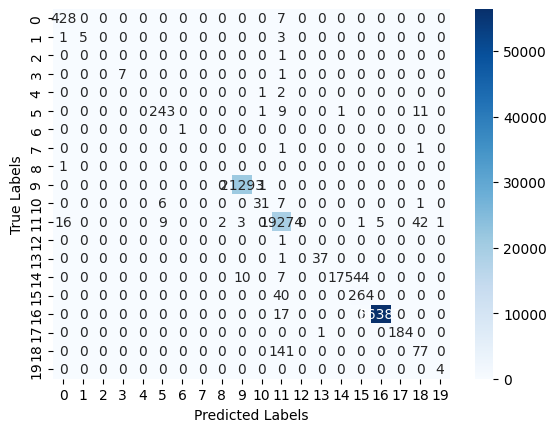

In [7]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
